/anaconda3/lib/python3.6/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'decode_packbits'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/anaconda3/lib/python3.6/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'decode_lzw'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/anaconda3/lib/python3.6/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'unpack_ints'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/anaconda3/lib/python3.6/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'reverse_bitorder'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))


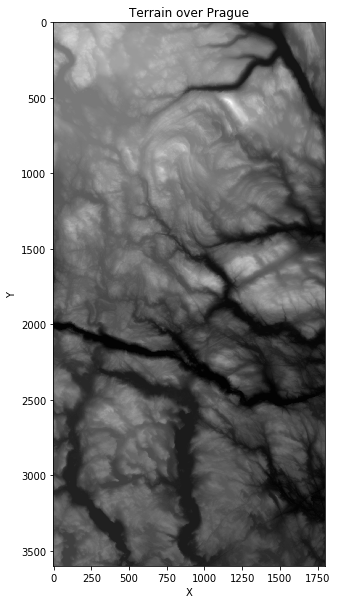

In [1]:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from functions1 import *
%matplotlib inline
# Load the terrain
terrain1 = imread('data/SRTM_data_Norway_1.tif')
# Show the terrain
plt.figure(figsize=(20,10))
plt.title('Terrain over Prague')
plt.imshow(terrain1, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [2]:
num_rows, num_cols = terrain1.shape
x = np.arange(num_rows)
y = np.arange(num_cols)
#x = np.random.rand(100,1)
#y = np.random.rand(100,1)
#print(x[0:450])
#print(y)
x, y = np.meshgrid(x,y)


In [3]:
#testing on a smaller data set
x1=x[0:225,0:450]
y1=y[0:225,0:450]
z1=(terrain1[0:225,0:450])

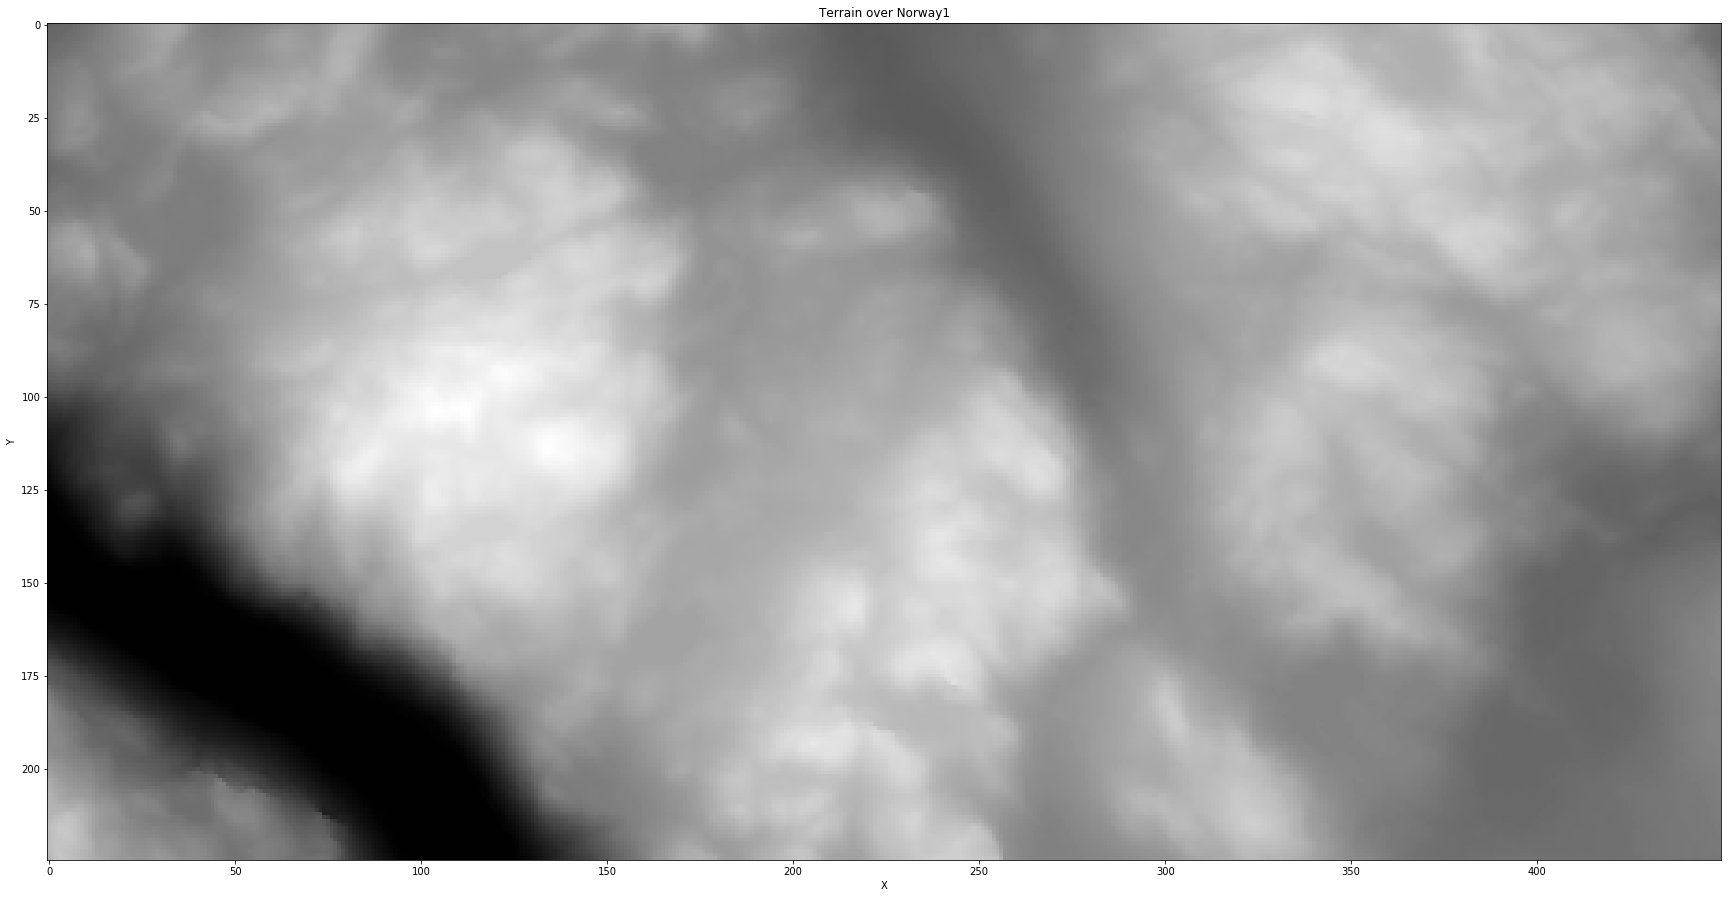

In [4]:
#plot
plt.figure(figsize=(30,20))
plt.title('Terrain over Norway1')
plt.imshow(z1, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
#Plotting as a 3D figure
p1=plotTheSurface(x1,y1,z1)
p1.show()

In [6]:

xVector=np.matrix.flatten(x1)
yVector=np.matrix.flatten(y1)
zVector=np.matrix.flatten(z1)
matrixSizey=np.size(y1,1)
matrixSizex=np.size(x1,0)


In [7]:
#Preparation for k-folds CV
sizeVector=np.size(zVector)
indeces=np.linspace(0,sizeVector-1,sizeVector)
indeces=indeces.astype(int)
numberOfFolds=10
folds = k_folds_CV(indeces, numberOfFolds)

polynom_oders=[3,4,5]
lambda_values=[1e-3,1e-2,1e-1,1,10,1e2]

In [8]:
#Testing OLS model for different polynomial

zPredictmatrix,statsMatrix,betaMatrix=olsModel(polynom_oders,xVector,yVector,zVector,numberOfFolds,folds,indeces)

Bias for the final model is: 10093.156649966459
Var for the final model is: 0.14912051949125868


/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


10093.156649966459
10093.30577048595


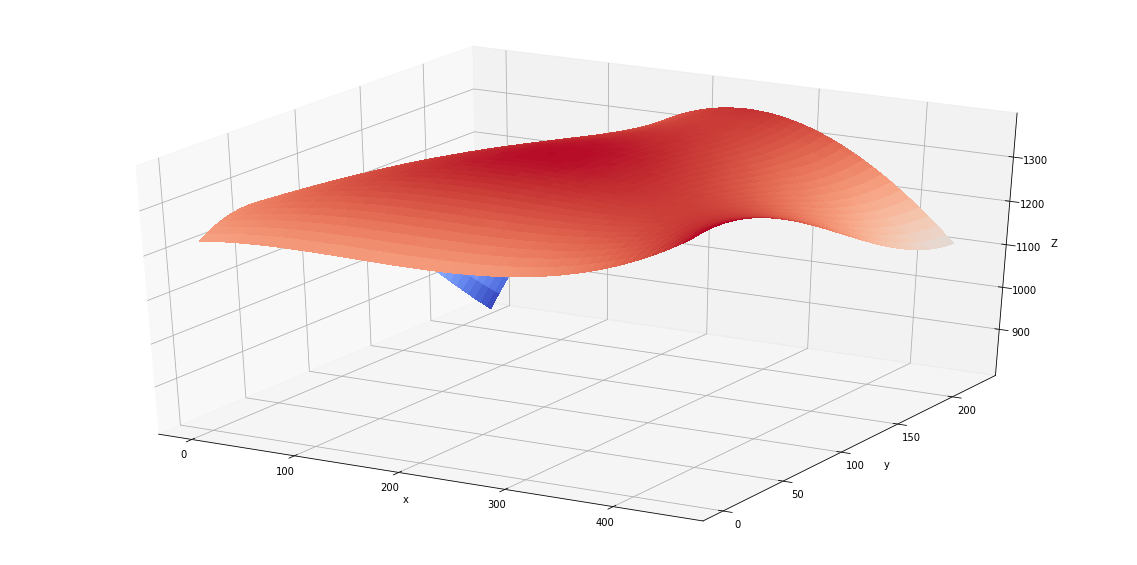

In [13]:

beta1=np.mean(betaMatrix[:,:,0],1)
z_pred=computeZpredict(xVector,yVector,beta1[0:np.count_nonzero(beta1)],3)
bias,var=computeBiasandVar(zPredictmatrix[:,:,0],zVector)
print('Bias for the final model is: ' + str(bias))
print('Var for the final model is: ' + str(var))
zPredictReshape=np.reshape(z_pred,(matrixSizex,matrixSizey))
fig1=plotTheSurface(x1,y1,zPredictReshape)
fig1.show()

print(str(MSE(z_pred,zVector)))
print(bias + var)


In [12]:
print(beta1)
print(beta1[0:np.count_nonzero(beta1)])
np.count_nonzero(beta1)

[ 1.22590335e+03  3.06059371e-01  2.07596030e+00 -2.48804689e-03
  1.52121569e-02 -3.03999031e-02  5.73372600e-06 -4.09958827e-05
  2.11747889e-05  5.64981488e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00]
[ 1.22590335e+03  3.06059371e-01  2.07596030e+00 -2.48804689e-03
  1.52121569e-02 -3.03999031e-02  5.73372600e-06 -4.09958827e-05
  2.11747889e-05  5.64981488e-05]


10

In [ ]:
plt.figure(figsize=(30,20))
plt.title('Terrain over Prague')
plt.imshow(zPredictReshape, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
#Ridge regression

zPredictmatrix,statsMatrix,betaMatrix=ridge_regress(lambda_values,polynom_oders,xVector,yVector,zVector,numberOfFolds,folds,indeces)
for j,order in enumerate(polynom_oders):
    for  h,lbd in enumerate(lambda_values): 
        print(lbd)
        print('Average of MSE for polynom order {} is:'.format(str(order)) + str(np.mean(statsMatrix[0,:,h,j])))
        print('Average of R2score for polynom order {} is:'.format(str(order)) + str(np.mean(statsMatrix[1,:,h,j])))
        print('\n')

In [ ]:
z_pred=np.mean(zPredictmatrix[:,:,5,0],1)

zPredictReshape=np.reshape(z_pred,(matrixSizex,matrixSizey))

fig1=plotTheSurface(x1,y1,zPredictReshape)
fig1.show()

In [ ]:

zPredictmatrix,statsMatrix,betaMatrix=lassoRegress(lambda_values,polynom_oders,xVector,yVector,zVector,numberOfFolds,folds,indeces)
for j,order in enumerate(polynom_oders):
    for  h,lbd in enumerate(lambda_values): 
        print(lbd)
        print('Average of MSE for polynom order {} is:'.format(str(order)) + str(np.mean(statsMatrix[0,:,h,j])))
        print('Average of R2score for polynom order {} is:'.format(str(order)) + str(np.mean(statsMatrix[1,:,h,j])))
        print('\n')

In [ ]:
z_pred=np.mean(zPredictmatrix[:,:,0,2],1)

zPredictReshape=np.reshape(z_pred,(matrixSizex,matrixSizey))

fig1=plotTheSurface(x,y,zPredictReshape)
fig1.show()

In [ ]:

beta,xx=OSLregression(xVector,yVector,zVector,5)
zPredictmatrix=computeZpredict(xVector,yVector,beta,5)
MSE1=MSE(zVector,zPredictmatrix)
r2score1=r2score(zVector,zPredictmatrix)
print(MSE1)
print(r2score1)
zPredictReshape=np.reshape(zPredictmatrix,(matrixSizex,matrixSizey))
fig1=plotTheSurface(x1,y1,zPredictReshape)
fig1.show()